In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.markers as mmarkers

matplotlib.rcParams['figure.dpi'] = 400

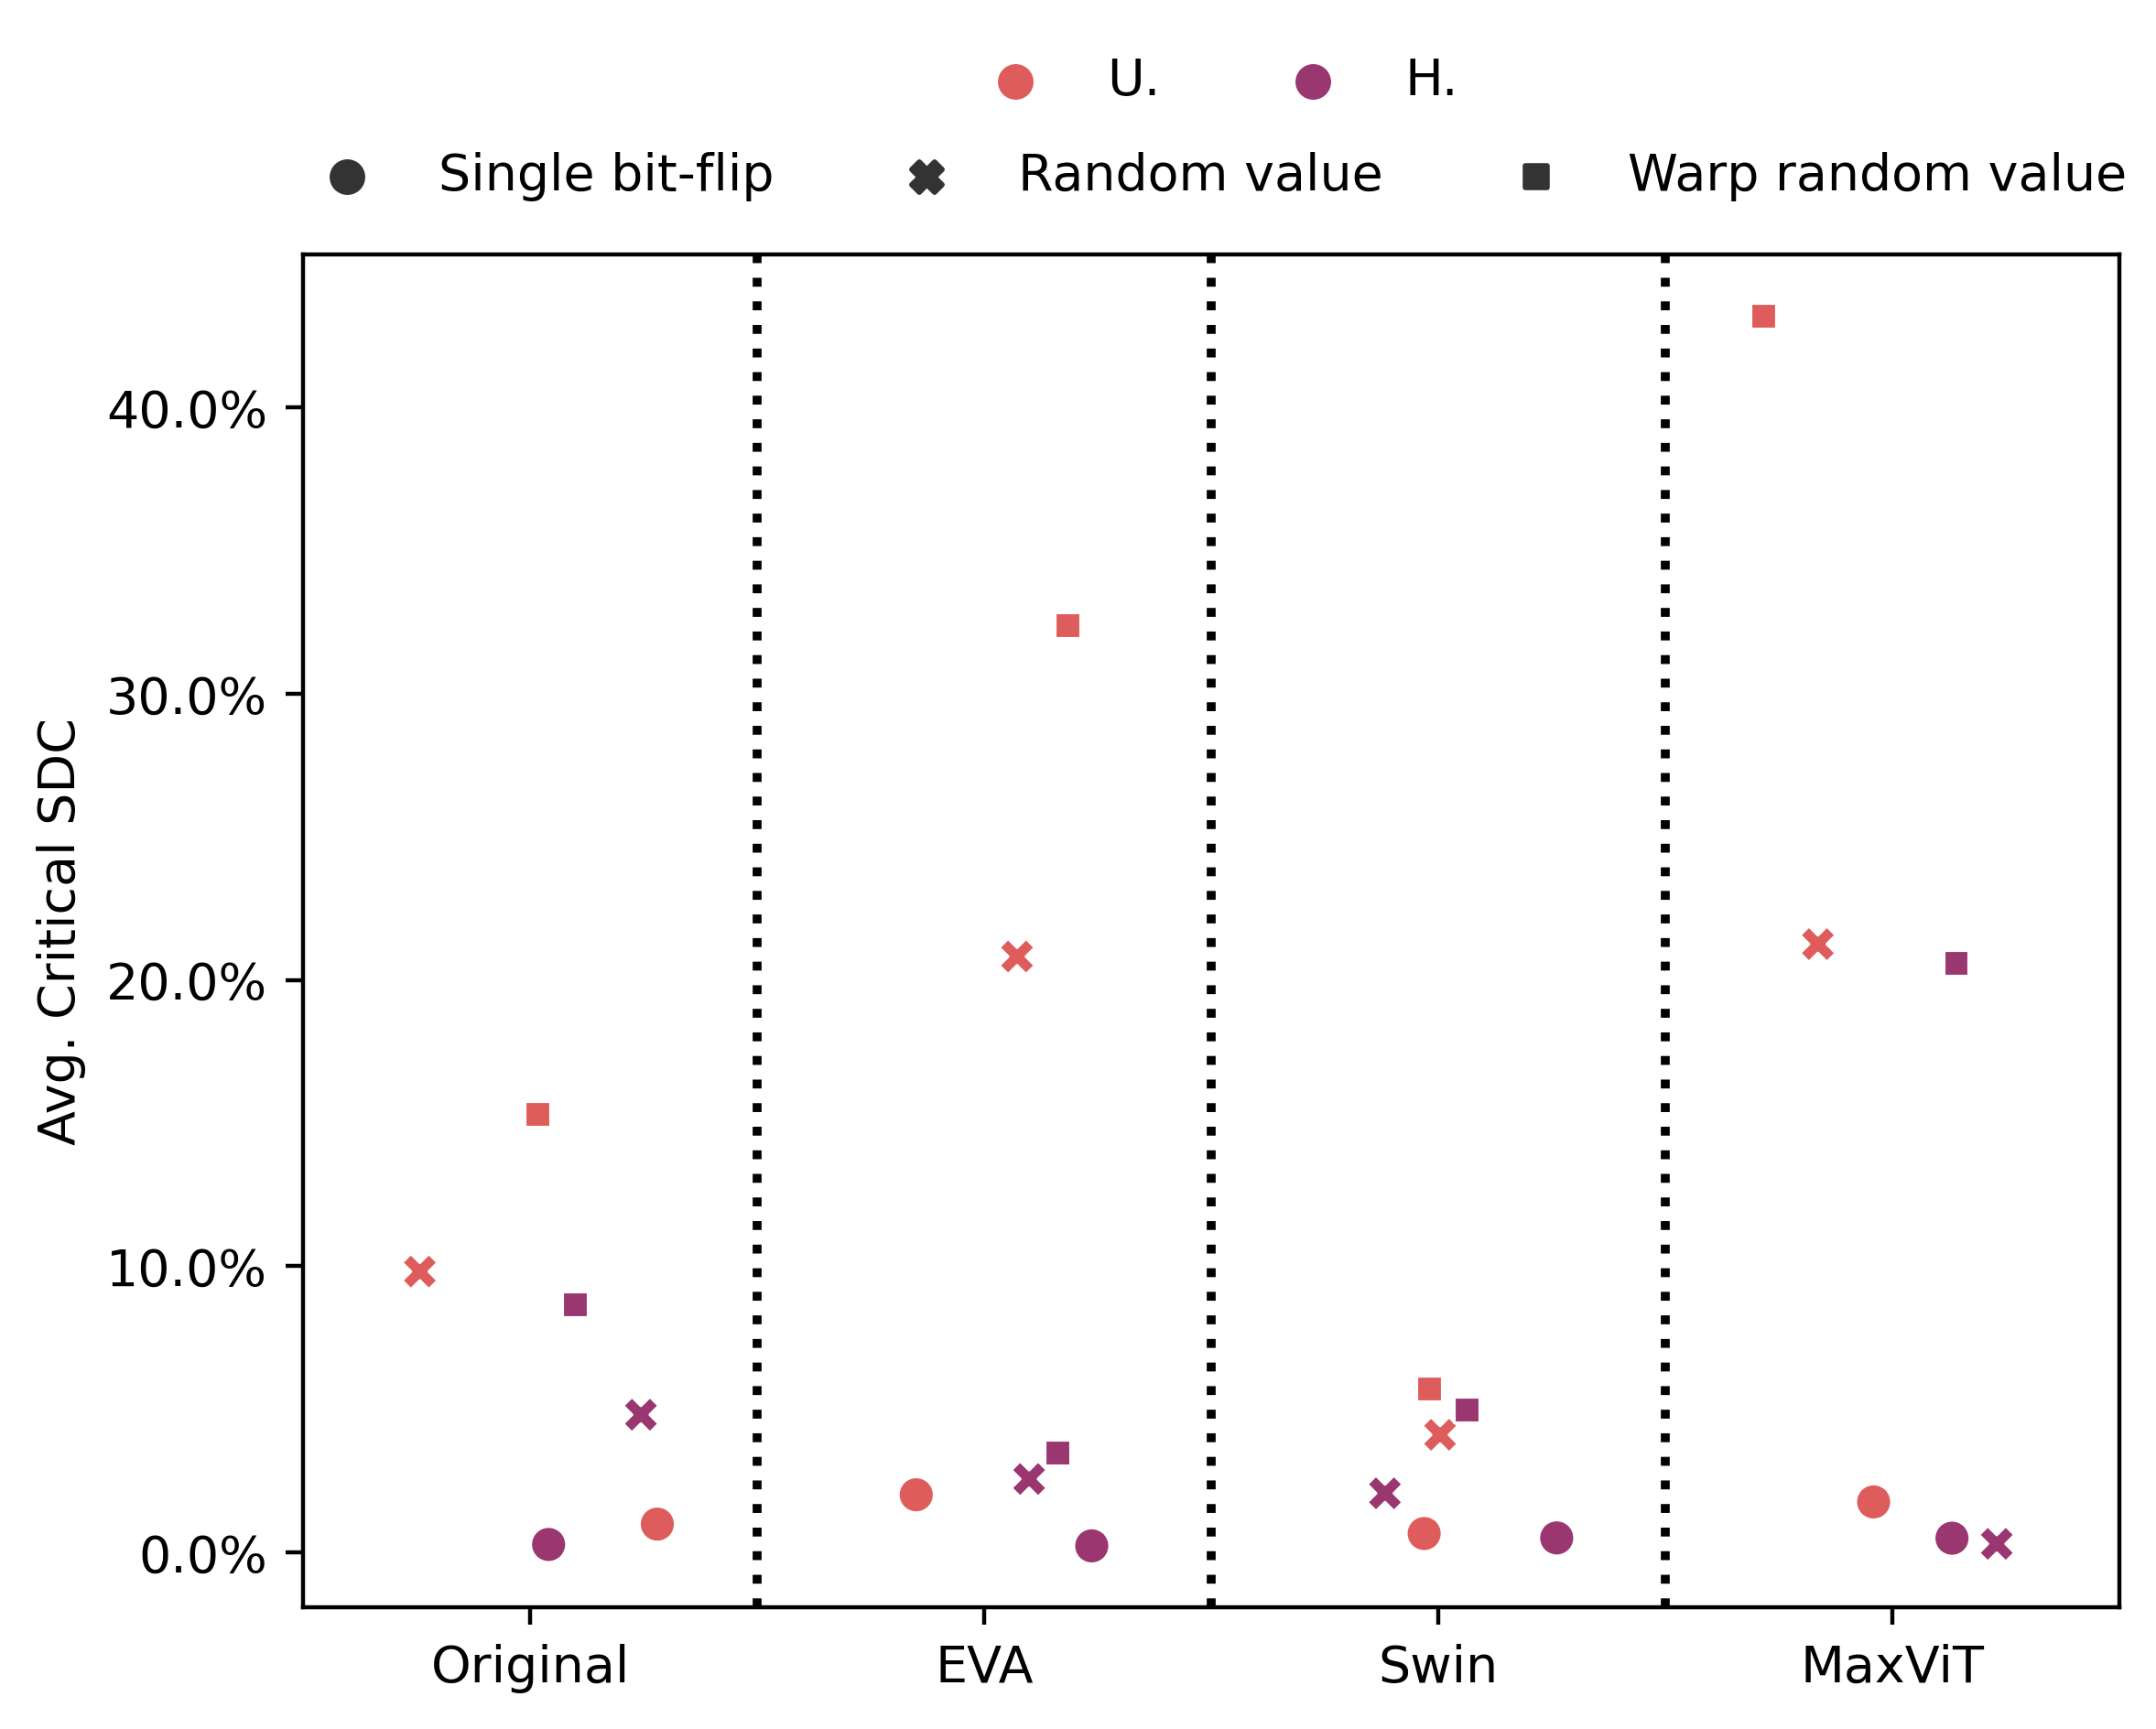

In [11]:
bfms = pd.read_csv("./bfm-stats.csv")
chart = sns.scatterplot(data=bfms, x="Family Model", y="Avg. Critical SDC", style="BFM", hue="Type", palette="flare", s=50, )
#sns.move_legend(chart, "upper center", ncols=2, bbox_to_anchor=(.5, 1.3), title=None, frameon=False)

for points in chart.collections:
    vertices = points.get_offsets().data
    if len(vertices) > 0:
        vertices[:, 0] += np.random.uniform(-0.3, 0.3, vertices.shape[0])
        points.set_offsets(vertices)

chart.set(xlabel=None)

handles, labels = chart.get_legend_handles_labels()
handles_type = handles[1:3]
handles_bfm = handles[4:]

bfms_lgd = plt.legend(handles=handles_bfm, loc="upper center", bbox_to_anchor=(.50,1.11), ncols=len(handles_bfm), frameon=False,)
plt.legend(handles=handles_type, loc="upper center", bbox_to_anchor=(.50,1.18), ncols=len(handles_type), frameon=False)

plt.gca().add_artist(bfms_lgd)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y}%')) 
chart.set_xlim(-0.5, 3.5)
plt.axvline(x=.5, color='black', ls=":", lw=1.75)
plt.axvline(x=1.5, color='black', ls=":", lw=1.75)
plt.axvline(x=2.5, color='black', ls=":", lw=1.75)